In [392]:
# Load libraries
import os
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, accuracy_score
from fancyimpute import KNN
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [393]:
# For maximizing Cell width of Jupyter Notebook Cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [394]:
# Set working directory
os.chdir("C:/Users/Mohammeds.Fakir/Kotak Case Study/")

In [395]:
# For Not Displaying warnings
import warnings
warnings.filterwarnings('ignore')

In [396]:
# Load data
abalone_df = pd.read_csv("abalone.data", sep = ',', header=None)
abalone_df.columns = ["Sex", "Length", "Diameter", "Height", "Whole.weight", "Shucked.weight", "Viscera.weight", "Shell.weight", "Rings"]

# Exploratory Data Analysis

In [397]:
# Display Shape of dataframe (Rows, Columns)
abalone_df.shape

(4177, 9)

In [398]:
# Display Top 5 rows of dataframe
abalone_df.head()

,Sex,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [399]:
# Check Datatypes of all the columns present in the dataset
abalone_df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole.weight      float64
Shucked.weight    float64
Viscera.weight    float64
Shell.weight      float64
Rings               int64
dtype: object

In [400]:
# Check Number of Unique values present in each variable
abalone_df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole.weight      2429
Shucked.weight    1515
Viscera.weight     880
Shell.weight       926
Rings               28
dtype: int64

In [401]:
# Describe Columns of Dataframe and check mean, std, quartiles, min-max for all variables
abalone_df.describe()

,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [402]:
#Converting Sex colmnn into categorical factors as they contain unqiue values
category_column_names = ['Sex']
continous_column_names = []

for i in abalone_df.columns:
    if i not in category_column_names:
        continous_column_names.append(i)

print("Categorical Columns : ",category_column_names)
print()
print("Continous Columns : ",continous_column_names)



Categorical Columns :  ['Sex']

Continous Columns :  ['Length', 'Diameter', 'Height', 'Whole.weight', 'Shucked.weight', 'Viscera.weight', 'Shell.weight', 'Rings']


In [403]:
#Make a copy of dataframe
df = abalone_df.copy()

In [404]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole.weight      float64
Shucked.weight    float64
Viscera.weight    float64
Shell.weight      float64
Rings               int64
dtype: object

# Missing Value Analysis

In [405]:
#Creating dataframe with number of missing values
missing_val = pd.DataFrame(df.isnull().sum())

#Reset the index to get row names as columns
missing_val = missing_val.reset_index()

#Rename the columns
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
missing_val

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df))*100

#Sort the rows according to decreasing missing percentage
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#Save output to csv file
missing_val.to_csv("Missing_percentage.csv", index = False)

missing_val

,Variables,Missing_percentage
0,Sex,0.0
1,Length,0.0
2,Diameter,0.0
3,Height,0.0
4,Whole.weight,0.0
5,Shucked.weight,0.0
6,Viscera.weight,0.0
7,Shell.weight,0.0
8,Rings,0.0


# Distribution of data

Skewness :  1.1137017739656028
Kurtosis :  2.3264623620128333


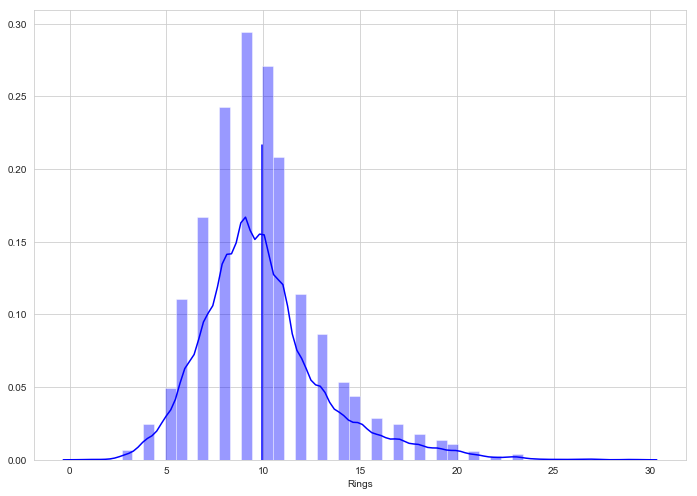

In [406]:
#Distribution of Response Variable 'Absent in Hours'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.distplot(df['Rings'], color = 'b')
ax = plt.axvline(df['Rings'].mean(), 0,0.7, color='b')

from scipy.stats import kurtosis, skew
print('Skewness : ', skew(df['Rings']))
print('Kurtosis : ', kurtosis(df['Rings']))

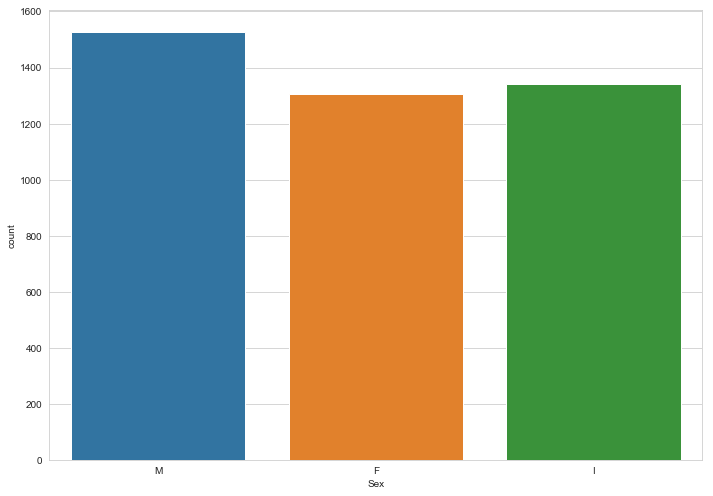

In [407]:
################################## Univariate Analysis of Categorical Variables ##########################################

# Frequency Countplot for Categorical variable
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.set_style("whitegrid")
sns.countplot(x='Sex', data=df);

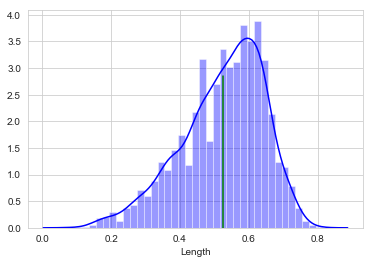

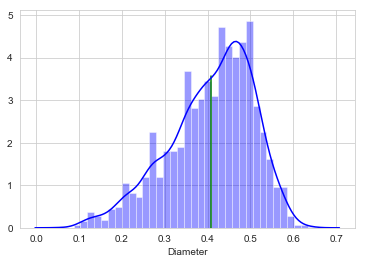

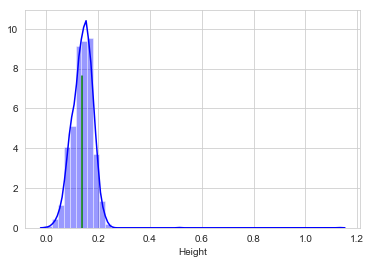

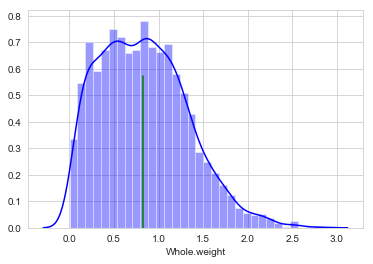

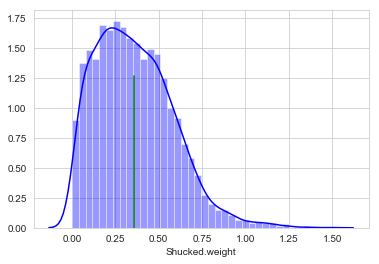

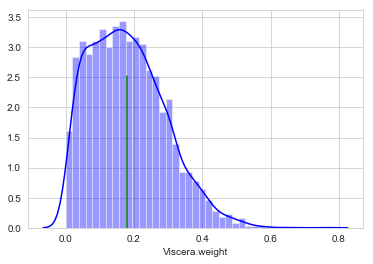

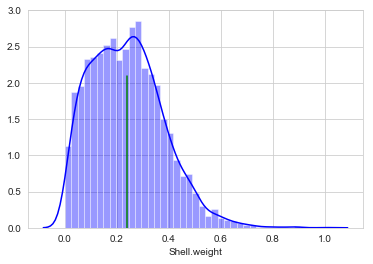

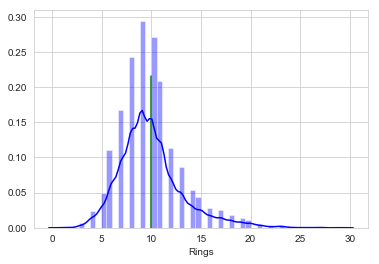

In [408]:
################################## Univariate Analysis of Numerical Variables ##########################################

# Histogram - Distribution plot for all continous variables
for i,col in enumerate(continous_column_names):
    #fig, ax = plt.subplots()
    #fig.set_size_inches(11.7, 8.27)
    plt.figure(i)
    plt.axvline(df[col].mean(), 0,0.7, color = 'g')
    sns.distplot(df[col], color = 'b')
    

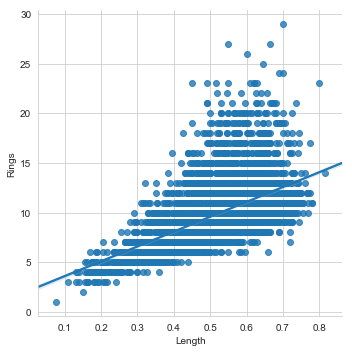

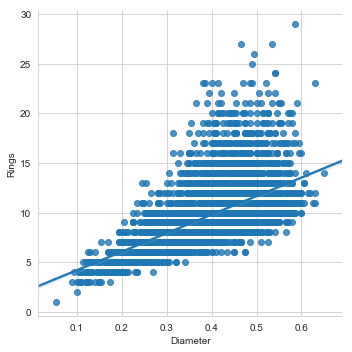

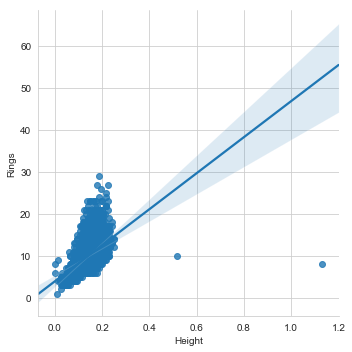

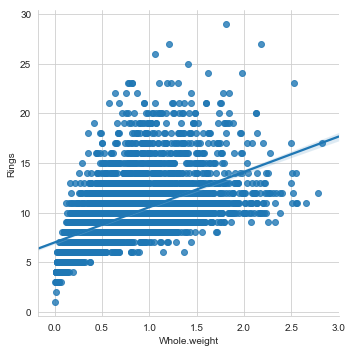

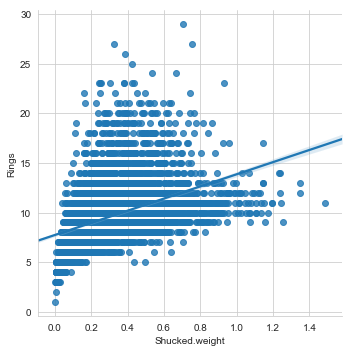

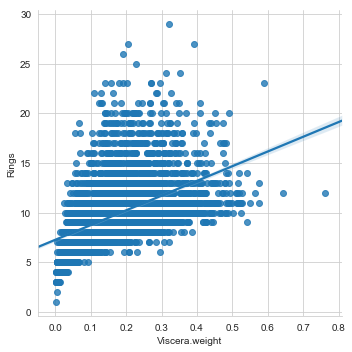

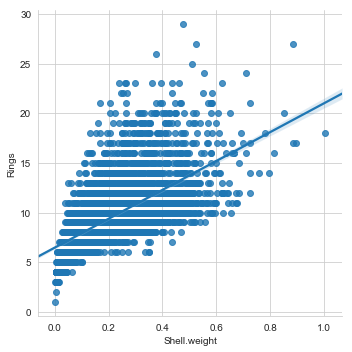

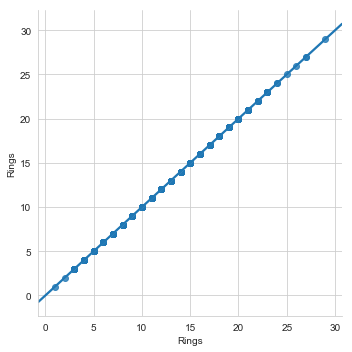

In [409]:
######################## Bivariate Analysis of Numerical Variables ################################
# Bivariate Analysis of all continous variables with Target Variable.
for i,col in enumerate(continous_column_names):
    sns.lmplot(x=col, y="Rings", data=df)    

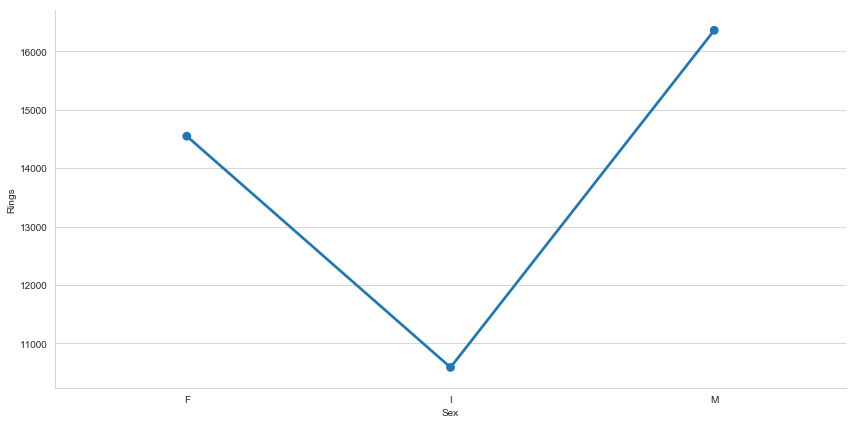

In [410]:
# Bivariate Analysis of all categorical variables with Target Variable.
df_cat = pd.DataFrame(df.groupby(['Sex'], as_index=False).sum())
sns.catplot(x='Sex', y="Rings", data=df_cat.reset_index(), kind="point", height=6, aspect=2)

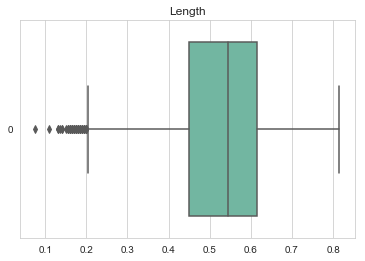

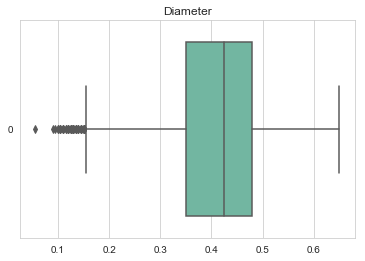

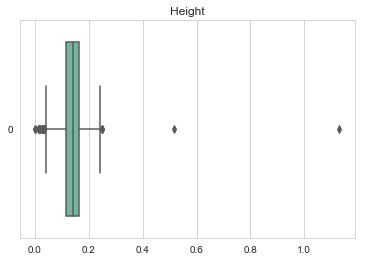

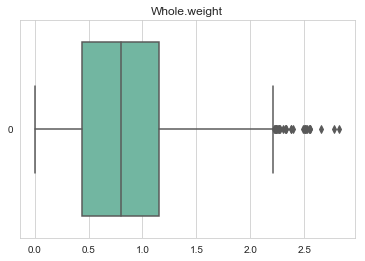

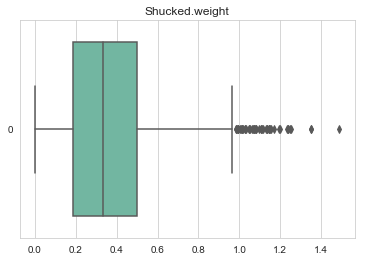

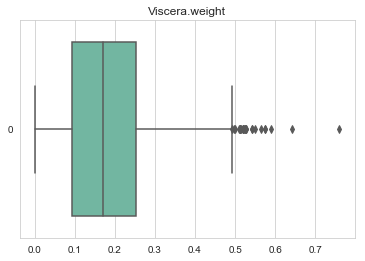

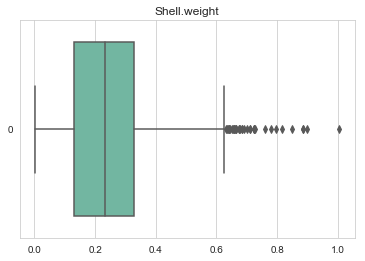

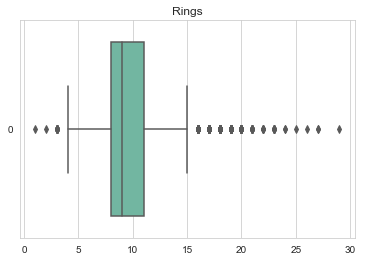

In [411]:
#################### Outlier Analysis #############################

### Checking Outliers using Boxplot Method

for i,col in enumerate(continous_column_names):
    #fig, ax = plt.subplots()
    #fig.set_size_inches(11.7, 8.27)
    plt.figure(i)
    plt.title(col)
    sns.boxplot(data=df[col], orient="h", palette="Set2")
    

# Outlier Analysis

In [412]:
#Check for outliers using boxplots
for i in continous_column_names:
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(df[i], [75,25])
    
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    # Replacing all the outliers value to NA
    df.loc[df[i]< minimum,i] = np.nan
    df.loc[df[i]> maximum,i] = np.nan


In [413]:
df_numeric = df[continous_column_names]

# Impute missing values with KNN
df_knn = pd.DataFrame(KNN(k = 3).complete(df_numeric), columns = df_numeric.columns)
df_knn['Sex'] = df['Sex'] 

# Checking if there is any missing value
df_knn.isnull().sum()

Imputing row 1/4177 with 0 missing, elapsed time: 4.925
Imputing row 101/4177 with 0 missing, elapsed time: 4.927
Imputing row 201/4177 with 0 missing, elapsed time: 4.928
Imputing row 301/4177 with 0 missing, elapsed time: 4.930
Imputing row 401/4177 with 0 missing, elapsed time: 4.933
Imputing row 501/4177 with 0 missing, elapsed time: 4.936
Imputing row 601/4177 with 1 missing, elapsed time: 4.939
Imputing row 701/4177 with 0 missing, elapsed time: 4.940
Imputing row 801/4177 with 0 missing, elapsed time: 4.942
Imputing row 901/4177 with 0 missing, elapsed time: 4.944
Imputing row 1001/4177 with 0 missing, elapsed time: 4.944
Imputing row 1101/4177 with 0 missing, elapsed time: 4.946
Imputing row 1201/4177 with 0 missing, elapsed time: 4.947
Imputing row 1301/4177 with 0 missing, elapsed time: 4.948
Imputing row 1401/4177 with 0 missing, elapsed time: 4.948
Imputing row 1501/4177 with 0 missing, elapsed time: 4.950
Imputing row 1601/4177 with 0 missing, elapsed time: 4.951
Imputing 

Length            0
Diameter          0
Height            0
Whole.weight      0
Shucked.weight    0
Viscera.weight    0
Shell.weight      0
Rings             0
Sex               0
dtype: int64

In [414]:
df_knn.dtypes

Length            float64
Diameter          float64
Height            float64
Whole.weight      float64
Shucked.weight    float64
Viscera.weight    float64
Shell.weight      float64
Rings             float64
Sex                object
dtype: object

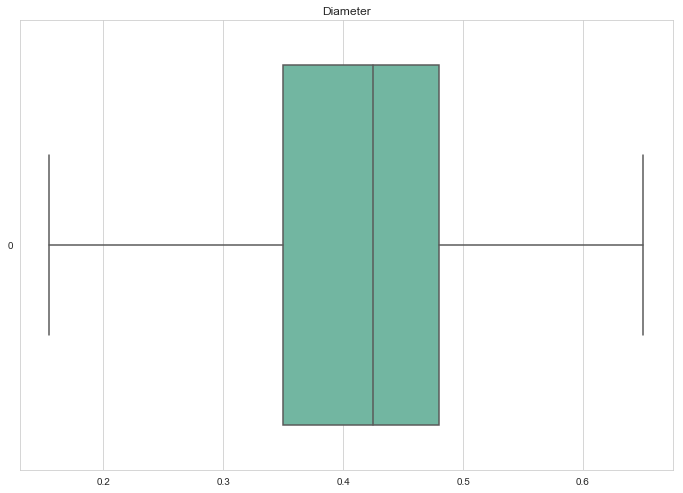

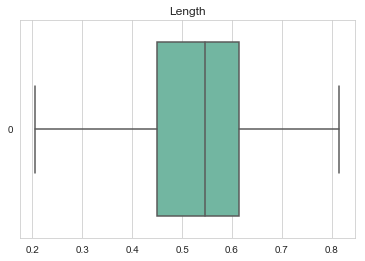

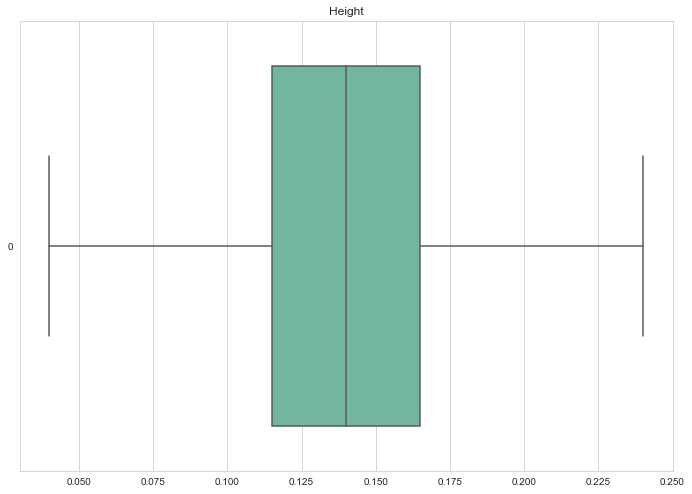

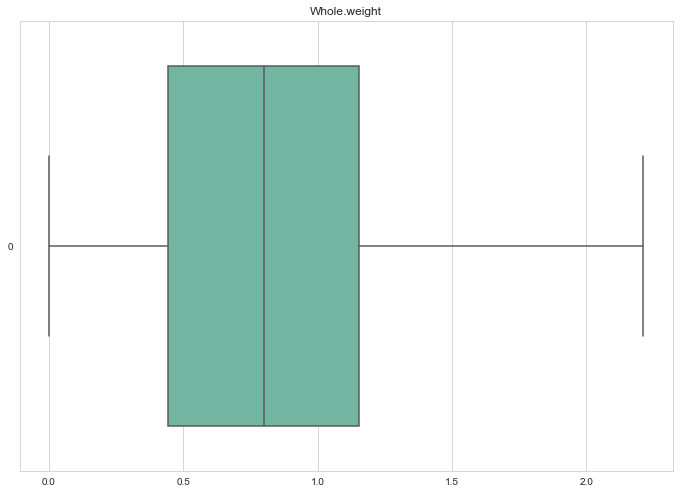

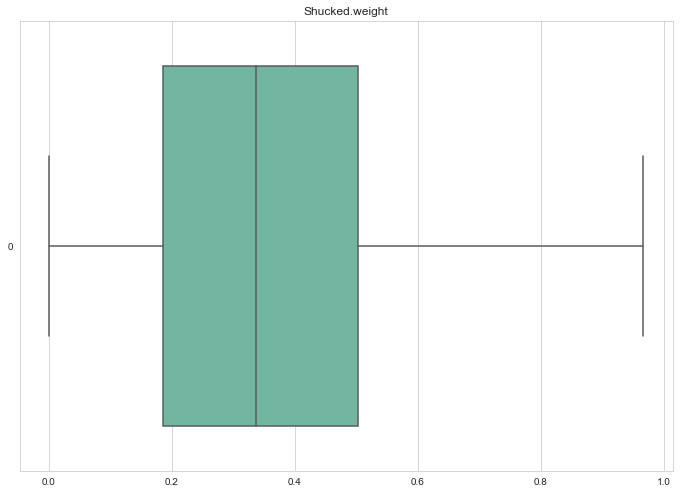

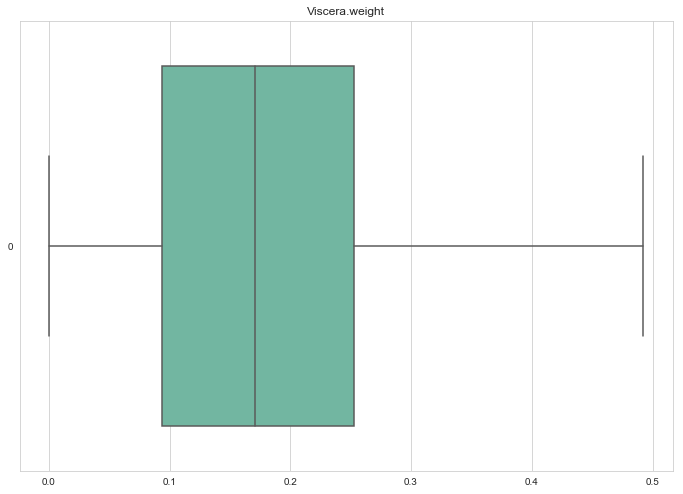

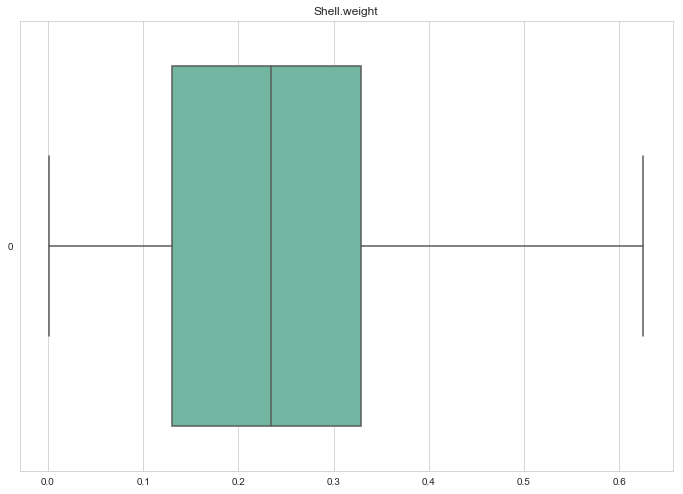

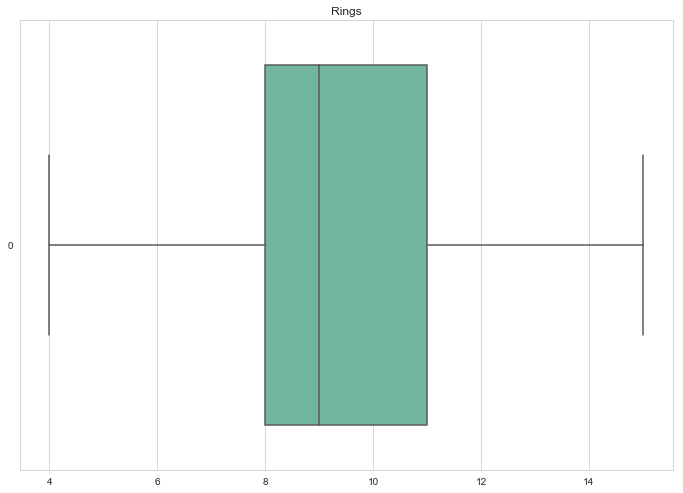

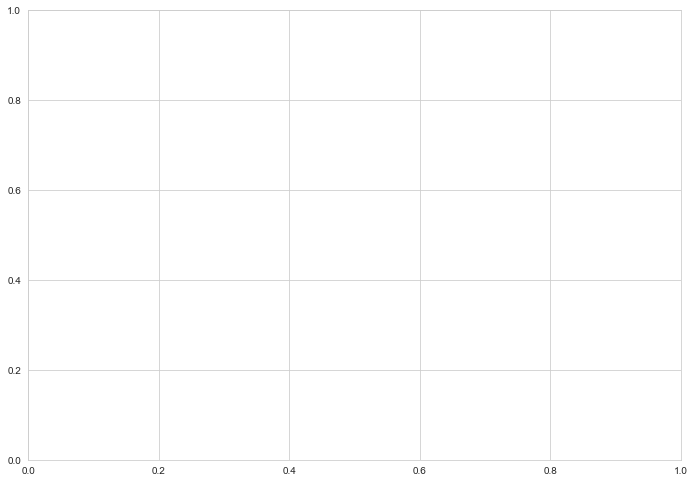

In [415]:
df = df_knn
#Check for outliers in data using boxplot
for i,col in enumerate(continous_column_names):
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    plt.figure(i)
    plt.title(col)
    sns.boxplot(data=df[col], orient="h", palette="Set2")

# Feature Selection

In [416]:
# Create df from continous variables
df_corr = df.loc[:,continous_column_names]

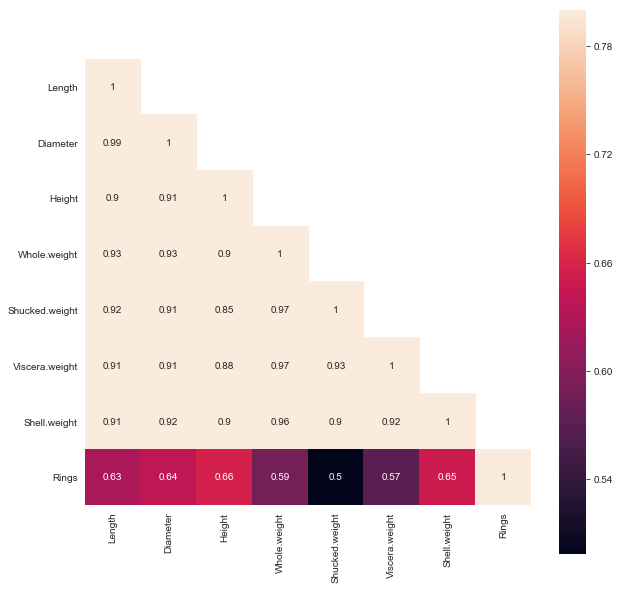

In [417]:
# Corelation graph for checking Multicollinearity for continous variables
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot heatmap using seaborn library
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
ax = sns.heatmap(corr, mask=mask, vmax=.8, square=True, annot=True, ax=ax)


In [418]:
##################### One hot Encoding #####################
# Encoding Categorical Data
df = pd.get_dummies(data = df, columns = category_column_names)


In [419]:
category_column_names_updated = []

#### Converting again uint8 to categorical data type
for i in range(0, df.shape[1]):
    if(df.iloc[:,i].dtypes == "uint8"):
        df.iloc[:,i] = df.iloc[:,i].astype('category')

In [420]:
df.dtypes

Length             float64
Diameter           float64
Height             float64
Whole.weight       float64
Shucked.weight     float64
Viscera.weight     float64
Shell.weight       float64
Rings              float64
Sex_F             category
Sex_I             category
Sex_M             category
dtype: object

In [421]:
category_column_names_updated = ['Sex_F', 'Sex_I', 'Sex_M']

#loop for ANOVA test Since the target variable is continuous
for i in category_column_names_updated:
    
    f, p = stats.f_oneway(df[i], df['Rings'])
    print("P value for variable "+str(i)+" is "+str(p))

P value for variable Sex_F is 0.0
P value for variable Sex_I is 0.0
P value for variable Sex_M is 0.0


In [422]:
#Make a copy of clean data
clean_data = df.copy()

# Feature Scaling

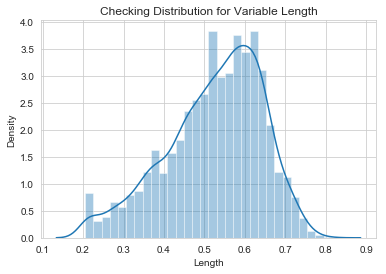

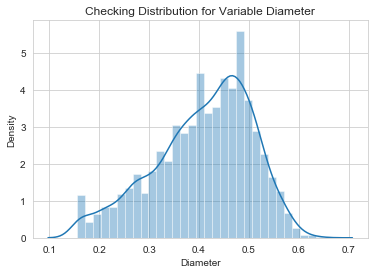

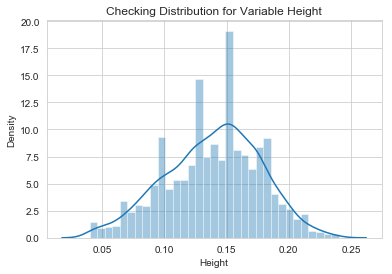

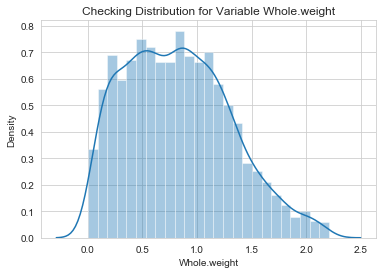

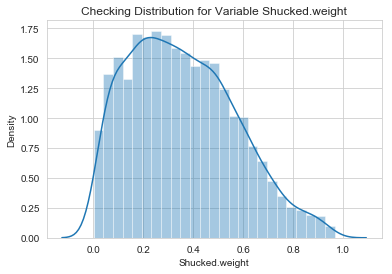

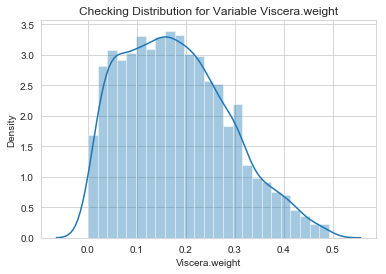

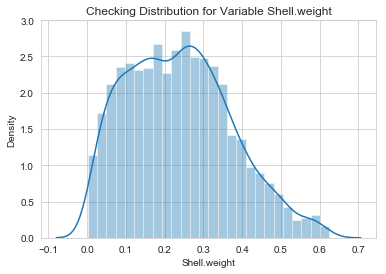

In [423]:
#Normality check
for i in continous_column_names:
    if i == 'Rings':
        continue
    sns.distplot(df[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [424]:
#Normalization of continuous variables
for i in continous_column_names:
    if i == 'Rings':
        continue
    df[i] = (df[i] - df[i].min())/(df[i].max()-df[i].min())

# Machine Learning Models

In [425]:
#Get number of rows and columns
df.shape

(4177, 11)

In [426]:
df.dtypes

Length             float64
Diameter           float64
Height             float64
Whole.weight       float64
Shucked.weight     float64
Viscera.weight     float64
Shell.weight       float64
Rings              float64
Sex_F             category
Sex_I             category
Sex_M             category
dtype: object

In [427]:
#Observe the first row
df.head(1)

,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Rings,Sex_F,Sex_I,Sex_M
0,0.409836,0.424242,0.275,0.231884,0.231726,0.204476,0.238172,15.0,0,0,1


In [428]:
#### Reordering the columns so 'Rings' gets to last column
cols = list(df.columns.values)
cols.remove('Rings')
cols.insert(len(cols), 'Rings')
df = df[cols]

In [429]:
df.head(1)

,Length,Diameter,Height,Whole.weight,Shucked.weight,Viscera.weight,Shell.weight,Sex_F,Sex_I,Sex_M,Rings
0,0.409836,0.424242,0.275,0.231884,0.231726,0.204476,0.238172,0,0,1,15.0


In [430]:
## Divide the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df.iloc[:, df.columns != 'Rings'], df.iloc[:, 10], test_size = 0.20, random_state = 1)

In [431]:
################ Evaluation Metrics ###########################
## Calculate MAPE 
def MAPE(y_act, y_pred):
    mape = np.mean(np.abs((y_act - y_pred)/ y_act))*100
    return mape

## Calculate RMSE
def RMSE(y_test,y_predict):
    mse = np.mean((y_test-y_predict)**2)
    rmse=np.sqrt(mse)
    return rmse

## Calculate Accuracy
def ACCURACY(mape):
    accuracy = abs(100 - np.mean(mape))
    return accuracy

## For Model Evaluations
def validate_results(predictions, y_test):
    #Create data frame for actual and predicted values
    eval_df = pd.DataFrame({'predicted':predictions, 'actual': y_test})
    print(eval_df.head())

    print()

    #Calculate RMSE and R-squared value
    print("RMSE : "+str(RMSE(y_test, predictions)))
    print("R^2 : "+str(r2_score(y_test, predictions)))

    #Scatter plot of Actual vs Predicted for Random Forest
    ax = sns.lmplot(x="predicted", y="actual", data=eval_df)
    
    # To check for condition (No. of Rings will be “>5” (greater than 5) or not.)
    eval_df['Actual_Class'] = np.where(y_test > 5 , 'Yes', 'No')
    eval_df['Predicted_Class'] = np.where(predictions > 5 , 'Yes', 'No')
    
    print()
    
    print(eval_df.head())
    
    print()
    
    print("Final Accuracy for No. of Rings will be greater than 5 or not : "
          +str(accuracy_score(eval_df['Actual_Class'],eval_df['Predicted_Class'])))

# Decision Tree

      predicted    actual
17     9.032286  10.00000
1131   8.619835   8.00000
299    8.784314   9.00000
1338   8.619835  10.00000
2383  12.618009   8.63067

RMSE : 1.689938922017304
R^2 : 0.4997562144958164

      predicted    actual Actual_Class Predicted_Class
17     9.032286  10.00000          Yes             Yes
1131   8.619835   8.00000          Yes             Yes
299    8.784314   9.00000          Yes             Yes
1338   8.619835  10.00000          Yes             Yes
2383  12.618009   8.63067          Yes             Yes

Final Accuracy for No. of Rings will be greater than 5 or not : 0.972488038277512


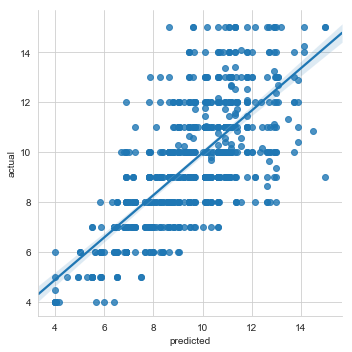

In [432]:
# Importing libraries for Decision Tree 
from sklearn.tree import DecisionTreeRegressor

#Build decsion tree using DecisionTreeRegressor
c50_model = DecisionTreeRegressor(random_state = 1, max_depth = 8, min_samples_split = 4).fit(X_train,y_train)

#Perdict for test cases
c50_predictions = c50_model.predict(X_test)

# Model Evaluation for Decision Tree
validate_results(c50_predictions, y_test)

# Random Forest


      predicted    actual
17     9.398409  10.00000
1131   8.805692   8.00000
299    8.459000   9.00000
1338   8.967692  10.00000
2383  11.962939   8.63067

RMSE : 1.5540609231787463
R^2 : 0.5769655210509042

      predicted    actual Actual_Class Predicted_Class
17     9.398409  10.00000          Yes             Yes
1131   8.805692   8.00000          Yes             Yes
299    8.459000   9.00000          Yes             Yes
1338   8.967692  10.00000          Yes             Yes
2383  11.962939   8.63067          Yes             Yes

Final Accuracy for No. of Rings will be greater than 5 or not : 0.9748803827751196


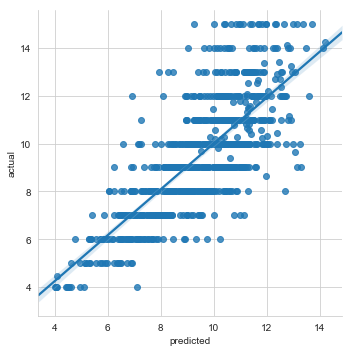

In [433]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

#Build random forest using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 1000, random_state = 1).fit(X_train,y_train)

#Perdict for test cases
rf_predictions = rf_model.predict(X_test)

# Model Evaluation for Random Forest
validate_results(rf_predictions, y_test)

# Linear Regression


            Names  Coefficients
0          Length      1.336226
1        Diameter      4.757442
2          Height      3.645107
3    Whole.weight      4.073590
4  Shucked.weight     -9.800218

      predicted    actual
17     8.682452  10.00000
1131   8.190339   8.00000
299    8.396982   9.00000
1338   9.572742  10.00000
2383  10.317435   8.63067

RMSE : 1.6168250722539035
R^2 : 0.5421051537941913

      predicted    actual Actual_Class Predicted_Class
17     8.682452  10.00000          Yes             Yes
1131   8.190339   8.00000          Yes             Yes
299    8.396982   9.00000          Yes             Yes
1338   9.572742  10.00000          Yes             Yes
2383  10.317435   8.63067          Yes             Yes

Final Accuracy for No. of Rings will be greater than 5 or not : 0.9677033492822966


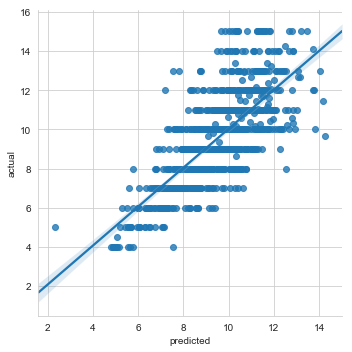

In [434]:
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

#Train the model
linear_regressor = LinearRegression().fit(X_train , y_train)

#Predict for test cases
linear_predictions = linear_regressor.predict(X_test)

#Get Linear Regression Equation along with Co-efficients
df_linear_coeff = pd.DataFrame(zip(df.columns, linear_regressor.coef_.tolist()), columns=['Names', 'Coefficients'])
print(df_linear_coeff.head())

print()

# Model Evaluation for Linear Regression
validate_results(linear_predictions, y_test)

# XG Boost


In [435]:
df_xgboost = df
for i in range(0, df_xgboost.shape[1]):
        df_xgboost.iloc[:,i] = df_xgboost.iloc[:,i].astype('float')
        
## Divide the dataset into train and test
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split( df_xgboost.iloc[:, df_xgboost.columns != 'Rings'], df_xgboost.iloc[:, 10], test_size = 0.20, random_state = 1)

      predicted    actual
17    10.375891  10.00000
1131   8.878872   8.00000
299    9.872638   9.00000
1338   9.191215  10.00000
2383  11.558874   8.63067

RMSE : 1.6007913104033076
R^2 : 0.5511418436687583

      predicted    actual Actual_Class Predicted_Class
17    10.375891  10.00000          Yes             Yes
1131   8.878872   8.00000          Yes             Yes
299    9.872638   9.00000          Yes             Yes
1338   9.191215  10.00000          Yes             Yes
2383  11.558874   8.63067          Yes             Yes

Final Accuracy for No. of Rings will be greater than 5 or not : 0.9760765550239234


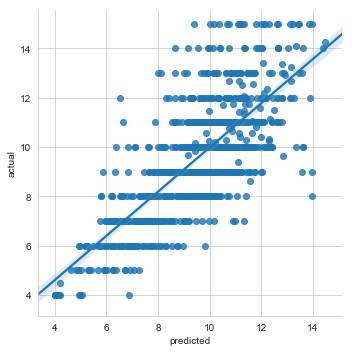

In [436]:
# Importing xgboost library
import xgboost

# Creating Model with parameters
xgb = xgboost.XGBRegressor(n_estimators=1000, booster='gbtree', learning_rate=0.05, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7, nthread=3)

# Train the model with data
xgb.fit(X_train_1,y_train_1)

# Test cases
xgb_predictions = xgb.predict(X_test_1)

# Model Evaluation for XGBoost
validate_results(xgb_predictions, y_test)

# Dimension Reduction using PCA

In [437]:
#Get the target variable
target = df['Rings']

In [438]:
#Get the number of rows and columns of data
df.shape

(4177, 11)

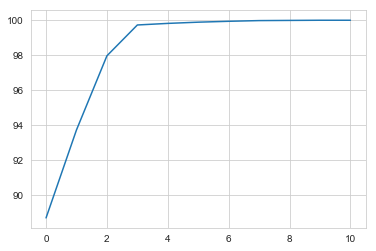

In [439]:
#Import library for PCA
from sklearn.decomposition import PCA

#Converting data to numpy array
X = df.values

# Data has 116 variables so no of components of PCA = 115
pca = PCA(n_components=11)
pca.fit(X)

# Proportion of variance explained
variance_explained = pca.explained_variance_ratio_

# Cumulative scree plot
var1 = np.cumsum(np.round(variance_explained, decimals=4)*100)

#Draw the plot
plt.plot(var1)
plt.show()

In [440]:
#Selecting 4 components since it explains almost 95+ % data variance
pca = PCA(n_components=4)

#Fitting the selected components to the data
pca.fit(X)

#Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state = 1)

# Decision Tree


      predicted    actual
17    10.000000  10.00000
1131   8.000000   8.00000
299    9.000000   9.00000
1338  10.000000  10.00000
2383   8.518675   8.63067

      predicted    actual
17    10.000000  10.00000
1131   8.000000   8.00000
299    9.000000   9.00000
1338  10.000000  10.00000
2383   8.518675   8.63067

RMSE : 0.01808906382262284
R^2 : 0.9999426845288075

      predicted    actual Actual_Class Predicted_Class
17    10.000000  10.00000          Yes             Yes
1131   8.000000   8.00000          Yes             Yes
299    9.000000   9.00000          Yes             Yes
1338  10.000000  10.00000          Yes             Yes
2383   8.518675   8.63067          Yes             Yes

Final Accuracy for No. of Rings will be greater than 5 or not : 0.9988038277511961


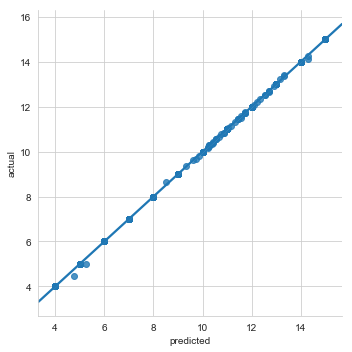

In [441]:
#Build decsion tree using DecisionTreeRegressor
c50_model = DecisionTreeRegressor(random_state = 1, max_depth = 8, min_samples_split = 4).fit(X_train,y_train)

#Perdict for test cases
c50_predictions = c50_model.predict(X_test)

#Create data frame for actual and predicted values
decision_tree_eval = pd.DataFrame({'predicted':c50_predictions, 'actual': y_test})
print(decision_tree_eval.head())

print()

# Model Evaluation for Decision Tree
validate_results(c50_predictions, y_test)

# Random Forest


      predicted    actual
17    10.000000  10.00000
1131   8.000000   8.00000
299    9.000000   9.00000
1338  10.000000  10.00000
2383   8.669969   8.63067

RMSE : 0.007931350762450409
R^2 : 0.9999889812076516

      predicted    actual Actual_Class Predicted_Class
17    10.000000  10.00000          Yes             Yes
1131   8.000000   8.00000          Yes             Yes
299    9.000000   9.00000          Yes             Yes
1338  10.000000  10.00000          Yes             Yes
2383   8.669969   8.63067          Yes             Yes

Final Accuracy for No. of Rings will be greater than 5 or not : 0.9988038277511961


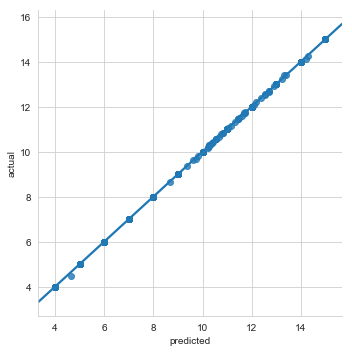

In [442]:
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

#Build random forest using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 1000, random_state = 1).fit(X_train,y_train)

#Perdict for test cases
rf_predictions = rf_model.predict(X_test)

# Model Evaluation for Random Forest
validate_results(rf_predictions,y_test)

# Linear Regression


            Names  Coefficients
0          Length  1.191762e-14
1        Diameter -7.756691e-15
2          Height -4.687769e-15
3    Whole.weight  1.191979e-14
4  Shucked.weight -1.486053e-15

      predicted    actual
17     10.00000  10.00000
1131    8.00000   8.00000
299     9.00000   9.00000
1338   10.00000  10.00000
2383    8.63067   8.63067

RMSE : 6.410948955560687e-15
R^2 : 1.0

      predicted    actual Actual_Class Predicted_Class
17     10.00000  10.00000          Yes             Yes
1131    8.00000   8.00000          Yes             Yes
299     9.00000   9.00000          Yes             Yes
1338   10.00000  10.00000          Yes             Yes
2383    8.63067   8.63067          Yes             Yes

Final Accuracy for No. of Rings will be greater than 5 or not : 1.0


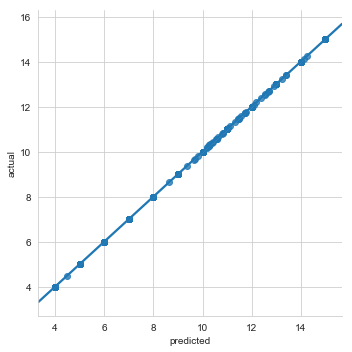

In [443]:
#Train the model
linear_regressor = LinearRegression().fit(X_train , y_train)

#Predict for test cases
linear_predictions = linear_regressor.predict(X_test)

#Get Linear Regression Equation along with Co-efficients
df_linear_coeff = pd.DataFrame(zip(df.columns, linear_regressor.coef_.tolist()), columns=['Names', 'Coefficients'])
print(df_linear_coeff.head())

print()

# Model Evaluation for Linear Regression
validate_results(linear_predictions, y_test)

# XG Boost


      predicted    actual
17     9.999998  10.00000
1131   8.000028   8.00000
299    8.999991   9.00000
1338   9.999976  10.00000
2383   8.513583   8.63067

RMSE : 0.006094021345866704
R^2 : 0.9999934949951123

      predicted    actual Actual_Class Predicted_Class
17     9.999998  10.00000          Yes             Yes
1131   8.000028   8.00000          Yes             Yes
299    8.999991   9.00000          Yes             Yes
1338   9.999976  10.00000          Yes             Yes
2383   8.513583   8.63067          Yes             Yes

Final Accuracy for No. of Rings will be greater than 5 or not : 0.9772727272727273


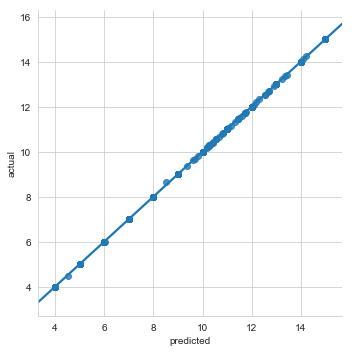

In [444]:
# Creating Model with parameters
xgb = xgboost.XGBRegressor(n_estimators=1000, booster='gbtree', learning_rate=0.05, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7, nthread=3)

# Train the model with data
xgb.fit(X_train,y_train)

# Test cases
xgb_predictions = xgb.predict(X_test)

# Model Evaluation for XG Boost
validate_results(xgb_predictions, y_test)

In [445]:
#### As seen above, after PCA, every algorithm gives the best result with very less RMSE and R^square of 0.99

In [446]:
########### Writing Final Results into CSV ##################
final_predictions_df = pd.DataFrame({'Actual_Value': y_test, 'Decision Tree': c50_predictions, 'Random Forest':rf_predictions, 
                                     'Linear Regression':linear_predictions, 'XGBoost' : xgb_predictions})

 # To check for condition (No. of Rings will be “>5” (greater than 5) or not.)
final_predictions_df['Actual_Class'] = np.where(y_test > 5 , 'Yes', 'No')
final_predictions_df['DecisionTree_Prediction'] = np.where(c50_predictions > 5 , 'Yes', 'No')
final_predictions_df['RandomForest_Prediction'] = np.where(rf_predictions > 5 , 'Yes', 'No')
final_predictions_df['LinearRegression_Prediction'] = np.where(linear_predictions > 5 , 'Yes', 'No')
final_predictions_df['XGBoost_Prediction'] = np.where(xgb_predictions > 5 , 'Yes', 'No')
    
final_predictions_df.to_csv("Final_Predictions_Python.csv", index = True)